In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from sklearn.model_selection import train_test_split

In [3]:
from keras import regularizers
df= pd.read_csv("creditcard.csv")

# **Balancing the data**

In [4]:
non_fraud=df[df["Class"]==0]
fraud = df[df["Class"]==1]
non_fraud.shape, fraud.shape

((43529, 31), (134, 31))

In [5]:
non_fraud=non_fraud.sample(fraud.shape[0])
non_fraud.shape

(134, 31)

In [6]:
data = fraud.append(non_fraud, ignore_index=True)
data.shape
data["Class"].value_counts()

0.0    134
1.0    134
Name: Class, dtype: int64

In [7]:
x_data= data.drop(columns="Class", axis=0)
label = data["Class"]

# **Splitting Training and Test data**

In [8]:
train_data, test_data, train_labels, test_labels=train_test_split(x_data, label, test_size=0.3, random_state=0, stratify = label)

In [9]:
train_data.shape, test_data.shape

((187, 30), (81, 30))

# **Normalizing the data**

In [10]:
mean=train_data.mean(axis=0)
std=train_data.std(axis=0)
train_data = (train_data-mean)/std
test_data = (test_data-mean)/std

In [11]:
train_labels=np.asarray(train_labels).astype(dtype="float64")
test_labels=np.asarray(test_labels).astype(dtype="float64")

# **Building The Network**

In [12]:
model= models.Sequential()
model.add(layers.Dense(20, activation="relu", input_shape=(train_data.shape[1],)))
#model.add(layers.Dropout(0.1))
model.add(layers.Dense(10, activation="relu"))
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(8,activation="relu"))
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(6,activation="relu"))
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [13]:
history=model.fit(train_data, train_labels, epochs=100, validation_split=.2)

Epoch 1/100
5/5 [==============================] - 1s 68ms/step - loss: 0.7096 - accuracy: 0.3435 - val_loss: 0.7170 - val_accuracy: 0.2895
Epoch 2/100
5/5 [==============================] - 0s 12ms/step - loss: 0.6914 - accuracy: 0.5771 - val_loss: 0.6983 - val_accuracy: 0.4737
Epoch 3/100
5/5 [==============================] - 0s 11ms/step - loss: 0.6808 - accuracy: 0.6621 - val_loss: 0.6813 - val_accuracy: 0.5789
Epoch 4/100
5/5 [==============================] - 0s 14ms/step - loss: 0.6718 - accuracy: 0.6809 - val_loss: 0.6670 - val_accuracy: 0.6053
Epoch 5/100
5/5 [==============================] - 0s 13ms/step - loss: 0.6549 - accuracy: 0.7830 - val_loss: 0.6526 - val_accuracy: 0.7368
Epoch 6/100
5/5 [==============================] - 0s 12ms/step - loss: 0.6383 - accuracy: 0.8570 - val_loss: 0.6337 - val_accuracy: 0.8684
Epoch 7/100
5/5 [==============================] - 0s 12ms/step - loss: 0.6280 - accuracy: 0.8675 - val_loss: 0.6145 - val_accuracy: 0.8947
Epoch 8/100
5/5 [===

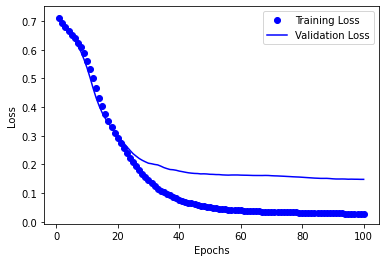

In [14]:
loss=history.history["loss"]
val_loss=history.history["val_loss"]
epochs=range(1, len(loss)+1)
plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "b", label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

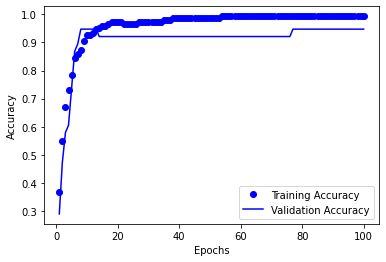

In [15]:
acc=history.history["accuracy"]
val_acc=history.history["val_accuracy"]
epochs=range(1, len(acc)+1)
plt.plot(epochs[:], acc[:], "bo", label="Training Accuracy")
plt.plot(epochs[:], val_acc[:], "b", label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [16]:
test_loss_score, test_acc_score=model.evaluate(test_data, test_labels)

3/3 [==============================] - 0s 3ms/step - loss: 0.2661 - accuracy: 0.9259


In [17]:
test_acc_score *100

92.59259104728699

In [19]:
prediction=model.predict(test_data).astype(dtype="u8")

In [20]:
prediction[45:60]

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0]], dtype=uint64)

In [21]:
test_labels[45:60]

array([0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.])